### 1 Data
choose MASTER_PhonesmartdataAll_CCI_AdvStats.csv as raw dataset and Create a scenario for overfitting by including a large number of features

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [87]:
# Load the dataset
df = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
df = df.drop('Device', axis=1, errors='ignore')
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
float_columns = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce').astype(int)

In [88]:
# Create a scenario for overfitting by including a large number of features
df = df [:50]
df['Duplicated_Age'] = df['Age']
df['Duplicated_STAI'] = df['STAI']
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Duplicated_Age,Duplicated_STAI
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333,31,43
8,2021,33,2,2,51,24,475,112,1278.250000,1263.913333,33,51
9,2021,27,1,3,32,4,155,97,650.187500,604.390000,27,32
12,2021,19,2,4,53,81,305,120,741.265000,662.885417,19,53
13,2021,20,2,2,36,47,210,105,970.483333,869.622500,20,36
15,2022,20,2,5,62,66,411,103,890.291667,736.222222,20,62
21,2022,27,1,3,39,55,160,95,756.595833,830.470833,27,39
30,2021,35,2,2,41,40,126,91,1080.641667,1047.227778,35,41
46,2021,22,2,4,39,18,320,80,647.673333,635.716667,22,39
52,2021,20,2,4,43,73,511,104,943.585000,910.548889,20,43


In [89]:
# Selecting relevant columns for the example
X = df[['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups','Duplicated_Age','Duplicated_STAI']]
y = df['VS_RT_correct_Single']  # Assuming a target variable for illustration

### 2 Model

In [90]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,Duplicated_Age,Duplicated_STAI
64,21,1,2,57,53,402,272,21,57
13,20,2,2,36,47,210,105,20,36
152,24,3,9,47,86,214,154,24,47
46,22,2,4,39,18,320,80,22,39
12,19,2,4,53,81,305,120,19,53
21,27,1,3,39,55,160,95,27,39
198,20,2,2,58,54,413,99,20,58
208,22,2,3,60,76,364,228,22,60
212,34,2,1,51,39,152,144,34,51
76,25,2,5,50,63,246,110,25,50


In [91]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the overfitting training data
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Make predictions on the overfitting test set
y_fit = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_fit)
print(f"Mean Squared Error (Overfitting) in Training: {mse_train}")

Mean Squared Error (Overfitting) in Training: 25033.573860851877


In [93]:
# Make predictions on the overfitting test set
y_pred = model.predict(X_test)
y_pred

array([ 771.8973375 , 1068.48160683,  880.39003707,  733.05237767,
        853.59040843,  839.82591502,  754.06658583,  797.49457671,
       1012.01297248,  927.8729141 ])

In [94]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Overfitting): {mse}")

Mean Squared Error (Overfitting): 46568.296197781776


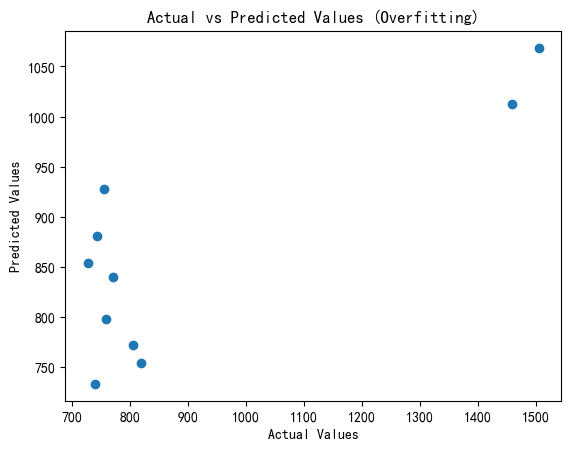

In [95]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Overfitting)")
plt.show()

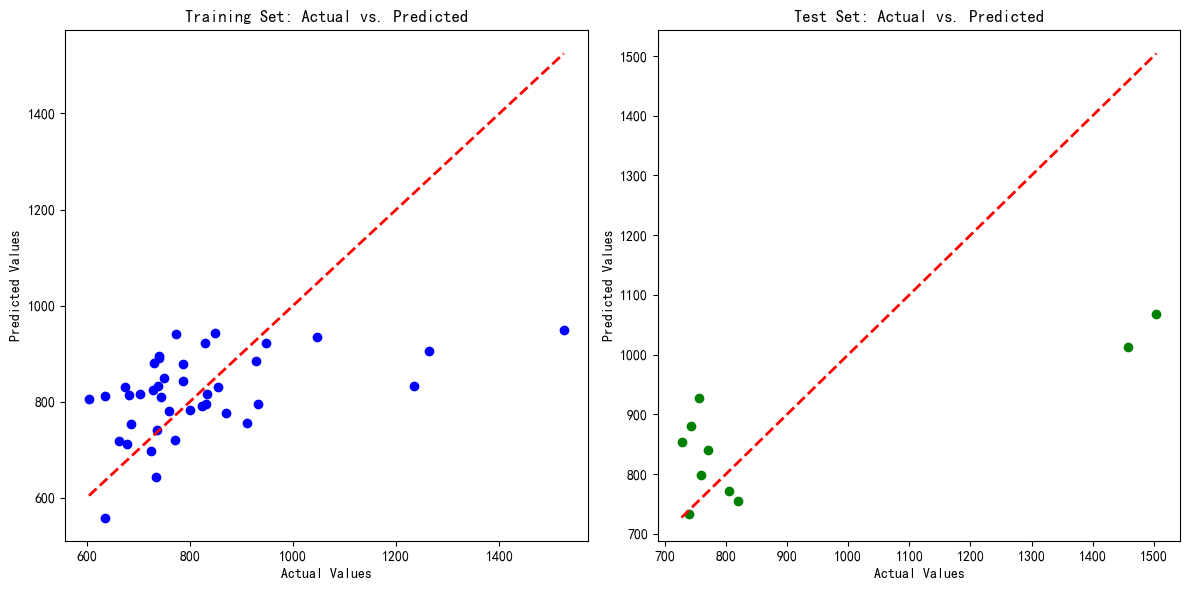

In [96]:
# Plotting actual vs. predicted values for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_fit, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting actual vs. predicted values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

### 3 Regularization

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3.1 Ridge Regression
L2 regularization

In [114]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [135]:
# Define a range of alpha values to try
alphas = [0.001,0.0001,0.1,1,10]

# Create Ridge regression model
ridge_model = Ridge()

# Set up the grid search
grid_search = GridSearchCV(ridge_model, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
best_alpha

10

In [136]:
# Train the Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [137]:
# Evaluate Ridge regression model
y_fit_ridge = best_ridge_model.predict(X_train)
mse_ridge = mean_squared_error(y_train, y_fit_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

Ridge Regression Mean Squared Error: 25161.964715182043


In [139]:
# Evaluate Ridge regression model
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

Ridge Regression Mean Squared Error: 48601.68482379245


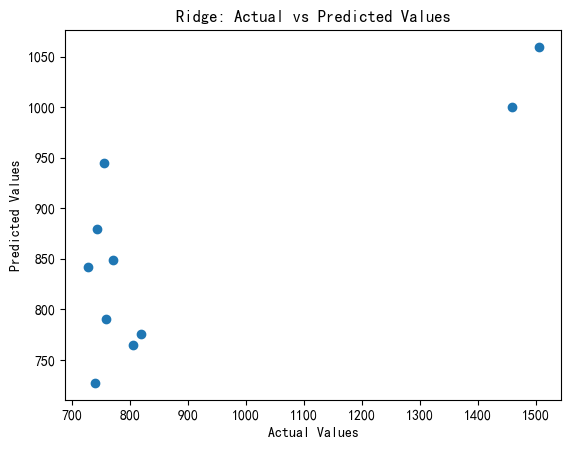

In [140]:
# Plot the actual vs predicted values
plt.scatter(y_test,y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge: Actual vs Predicted Values")
plt.show()

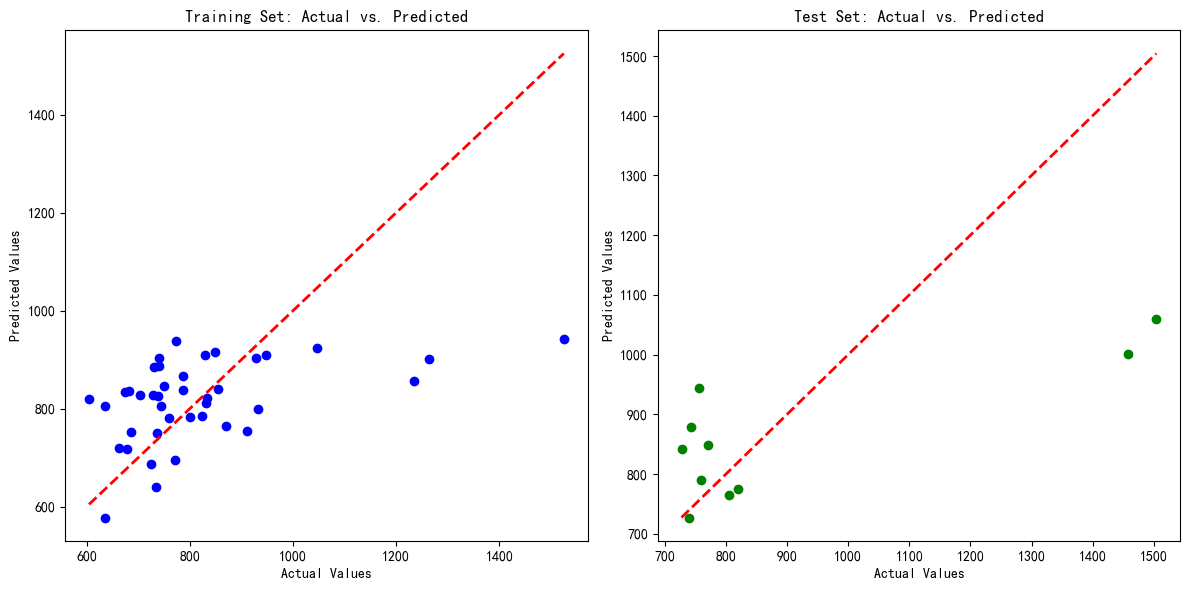

In [141]:
# Plotting actual vs. predicted values for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_fit_ridge, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting actual vs. predicted values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

#### 3.2 Lasso Regression
L1 regularization

In [142]:
from sklearn.linear_model import Lasso

In [143]:
# Define a range of alpha values to try
alphas = [0.0001,0.001,0.1,1,10]

# Create Ridge regression model
lasso_model = Lasso()

# Set up the grid search
grid_search = GridSearchCV(ridge_model, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
best_alpha

10

In [144]:
# Create Lasso regression model
best_lasso_model = Lasso(alpha=best_alpha)  # You can adjust the alpha (regularization strength) parameter
best_lasso_model.fit(X_train, y_train)

Lasso(alpha=10)

In [150]:
# Evaluate Ridge regression model
y_fit_lasso = best_lasso_model.predict(X_train)
mse_lasso = mean_squared_error(y_train, y_fit_lasso)

print(f"Ridge Regression Mean Squared Error: {mse_lasso}")

Ridge Regression Mean Squared Error: 25430.335873318738


In [151]:
# Evaluate Lasso regression model
y_pred_lasso = best_lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression Mean Squared Error: {mse_lasso}")

Lasso Regression Mean Squared Error: 51380.68394671244


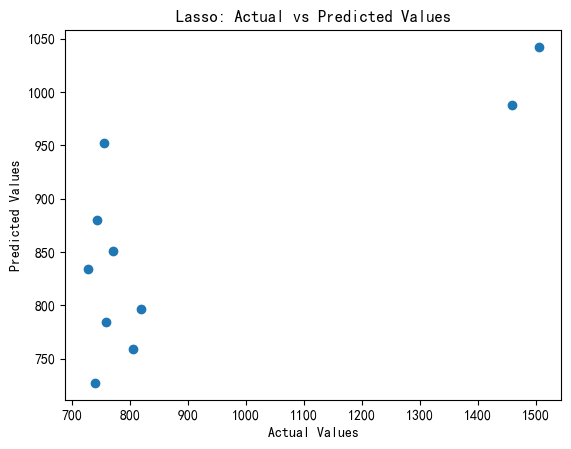

In [152]:
# Plot the actual vs predicted values
plt.scatter(y_test,y_pred_lasso)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso: Actual vs Predicted Values")
plt.show()

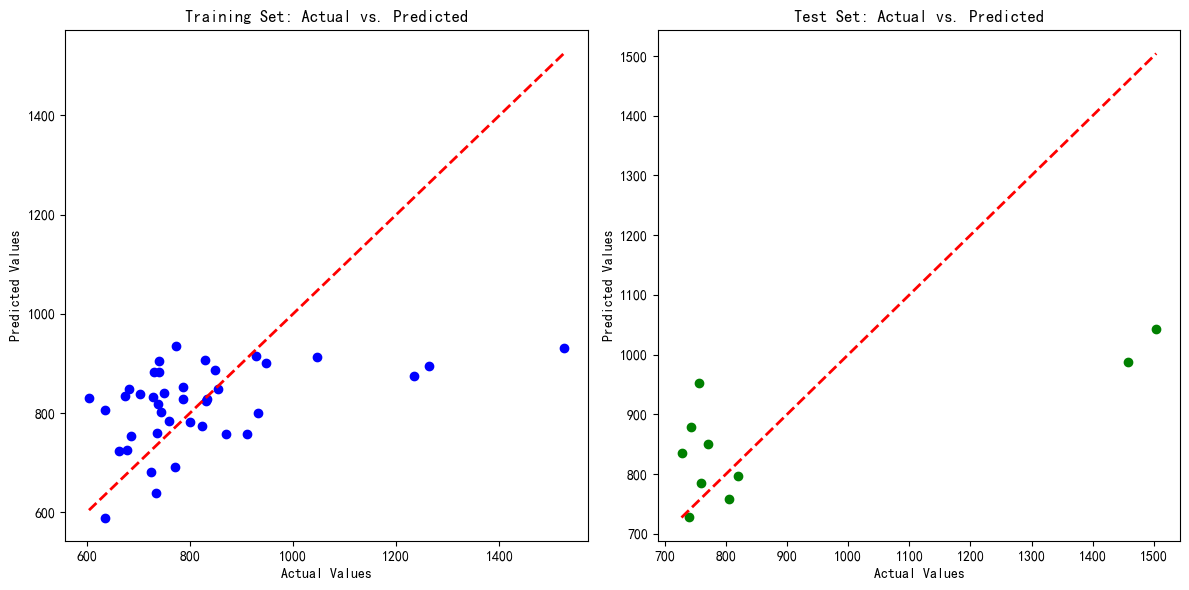

In [153]:
# Plotting actual vs. predicted values for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_fit_lasso, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting actual vs. predicted values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()